In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Greenhouse Gas Emissions

In [2]:
gh=pd.read_csv("climate_change.csv")
gh

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [3]:
data1=gh [["Temp"]]
data1

,Temp
0,0.109
1,0.118
2,0.137
3,0.176
4,0.149
...,...
303,0.407
304,0.378
305,0.440
306,0.394


In [4]:
gh2=gh.drop(["Year", "Month", "Temp"], axis=1)
gh2

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048


In [5]:
from sklearn.preprocessing import StandardScaler
#PCA is effected by scale so we need to scale the features in our data before applying PCA.
#Using StandardScaler to helps standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 
#which is a requirement for the optimal performance of many machine learning algorithms.
scaler=StandardScaler()
scaler.fit(gh2)

StandardScaler()

In [6]:
scaled_data=scaler.transform(gh2)
scaled_data
#standart deviation as 1 and mean is 0

array([[ 2.43534589, -1.3674928 , -2.41935872, ..., -2.55333892,
         0.07930841,  2.40128134],
       [ 2.01992275, -1.40233993, -2.52549908, ..., -2.52328676,
         0.12542829,  2.16336977],
       [ 1.56498635, -1.51084122, -2.53615661, ..., -2.490775  ,
         0.53699806,  1.94614617],
       ...,
       [-1.12725465,  1.56521016,  1.39973651, ...,  0.64784874,
        -0.98972024, -0.41572953],
       [-0.95745444,  1.65549591,  1.36036888, ...,  0.647485  ,
        -0.91302089, -0.40883354],
       [-1.0055111 ,  1.76874909,  1.37146141, ...,  0.64919979,
        -0.94786144, -0.41572953]])

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [8]:
scaled_data.shape

(308, 8)

In [9]:
x_pca.shape

(308, 2)

In [10]:
df = pd.DataFrame(x_pca)
df

,0,1
0,5.329283,1.342584
1,5.283326,1.012937
2,5.195678,0.820347
3,5.134684,0.509447
4,4.946212,-0.103169
...,...,...
303,-2.031982,-1.447522
304,-2.187268,-1.619819
305,-2.413405,-1.665026
306,-2.447782,-1.560364


In [11]:
df2 = df.set_axis(['principal_component_1', 'principal_component_2'], axis=1, inplace=False)
df2

,principal_component_1,principal_component_2
0,5.329283,1.342584
1,5.283326,1.012937
2,5.195678,0.820347
3,5.134684,0.509447
4,4.946212,-0.103169
...,...,...
303,-2.031982,-1.447522
304,-2.187268,-1.619819
305,-2.413405,-1.665026
306,-2.447782,-1.560364


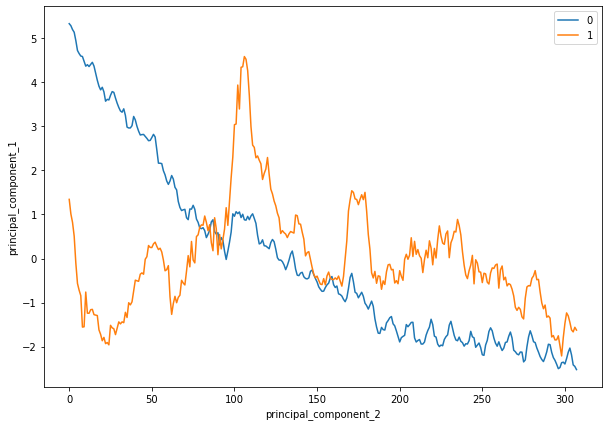

In [12]:
df.plot(figsize=(10,7))
plt.ylabel("principal_component_1")
plt.xlabel("principal_component_2")
plt.legend()
plt.show()

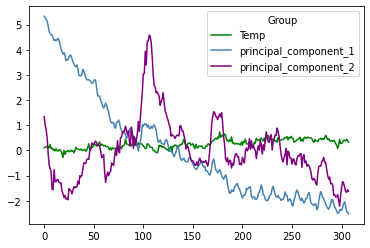

In [13]:
plt.plot(data1['Temp'], label='Temp', color='green')
plt.plot(df2['principal_component_1'], label='principal_component_1', color='steelblue')
plt.plot(df2['principal_component_2'], label='principal_component_2', color='purple')

plt.legend(title='Group')
plt.show()

### Total Wildfires

In [14]:
fire=pd.read_csv("Federal.csv")
fire

,Year,Fires,Acres,ForestService,DOIAgencies,Total
0,1985,"82,591","2,896,147","$161,505,000","$78,438,000","$239,943,000"
1,1986,"85,907","2,719,162","$111,625,000","$91,153,000","$202,778,000"
2,1987,"71,300","2,447,296","$253,657,000","$81,452,000","$335,109,000"
3,1988,"72,750","5,009,290","$429,609,000","$149,317,000","$578,926,000"
4,1989,"48,949","1,827,310","$331,672,000","$168,115,000","$499,787,000"
5,1990,"66,481","4,621,621","$253,700,000","$144,252,000","$397,952,000"
6,1991,"75,754","2,953,578","$132,300,000","$73,820,000","$206,120,000"
7,1992,"87,394","2,069,929","$290,300,000","$87,166,000","$377,466,000"
8,1993,"58,810","1,797,574","$184,000,000","$56,436,000","$240,436,000"
9,1994,"79,107","4,073,579","$757,200,000","$161,135,000","$918,335,000"


In [15]:
d=fire.sort_values('Acres', axis=0, ascending=False, inplace=False, kind='heapsort', na_position='last')
print(d)

    Year   Fires      Acres   ForestService   DOIAgencies           Total
35  2020  58,950  9,922,336  $1,764,000,000  $510,000,000  $2,274,000,000
30  2015  68,151  9,825,149  $1,713,000,000  $417,543,000  $2,130,543,000
32  2017  71,499  9,626,086  $2,410,165,000  $508,000,000  $2,918,165,000
21  2006  96,385  9,573,745  $1,280,419,000  $424,058,000  $1,704,477,000
22  2007  85,705  9,328,045  $1,149,654,000  $470,491,000  $1,620,145,000
27  2012  67,774  9,326,238  $1,436,614,000  $465,832,000  $1,902,446,000
33  2018  58,083  8,767,492  $2,615,256,000  $528,000,000  $3,143,256,000
26  2011  74,126  8,711,367  $1,055,736,000  $318,789,000  $1,374,525,000
20  2005  66,753  8,689,389    $524,900,000  $294,054,000    $818,954,000
19  2004  65,461  8,097,880    $726,000,000  $281,244,000  $1,007,244,000
15  2000  92,250  7,383,493  $1,076,000,000  $334,802,000  $1,410,802,000
17  2002  73,457  7,184,712  $1,279,000,000  $395,040,000  $1,674,040,000
11  1996  96,363  6,065,998    $547,50

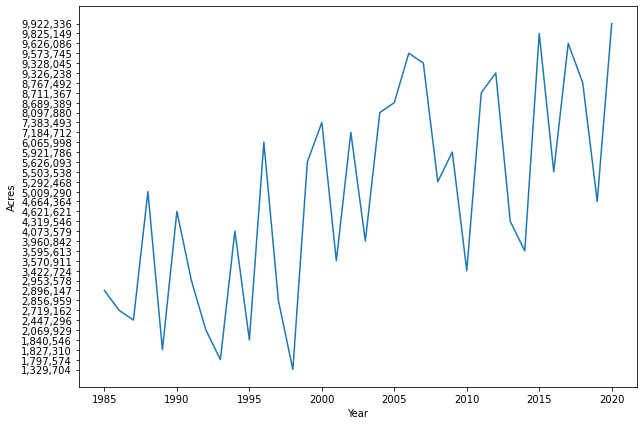

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y= 'Acres',data=d)
plt.show()

In [ ]:
#In this graph we can see the amount of areas affected by forest fires by years. There has been a very high number of 
#increase in the number of affected areas since 1985. Altough there are decreases from time to time, there is always an 
#increase in the total burned areas. Scientific studies show that the main cause of these fires is global warming.